### On importe les modules pour le traitement d’images, la construction du modèle CNN, et la visualisation des résultats.

In [8]:
!pip install charset_normalizer

In [9]:
# 1. Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### On applique des transformations aux images d'entraînement pour améliorer la robustesse du modèle. Les images sont normalisées (valeurs entre 0 et 1).

In [20]:
# 2. Préparation des données avec augmentation
train = r"C:\Users\j_aka\Desktop\DL Project\seg_train\seg_train"
#val = r"C:\Users\j_aka\Desktop\DL Project\seg_test\seg_pred"
test = r"C:\Users\j_aka\Desktop\DL Project\seg_test\seg_test"


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Générateur avec split pour créer un ensemble de validation à partir de seg_train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2  # 20% des données pour la validation
)
# Générateur d'entraînement
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Générateur de validation
val_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
# Générateur de test (sans split)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


### On charge les images depuis les dossiers structurés. Le modèle apprend à prédire une des 6 classes (catégoriel).

In [21]:
# 3. Chargement des images
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset = 'training'
    
)

val_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset = 'validation'
)

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


###  Le modèle comporte 3 blocs convolution + pooling, puis une couche dense avec Dropout pour éviter le surapprentissage. La sortie utilise softmax pour la classification multi-classes.


In [22]:
# 4. Construction du modèle CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

c:\Users\j_aka\anaconda3\envs\statistique\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### On utilise l’optimiseur Adam et la fonction de perte adaptée à la classification multi-classes.

In [23]:
# 5. Compilation du modèle
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Le modèle est entraîné pendant 15 époques. On suit la performance sur l’ensemble de validation.

In [24]:
# 6. Entraînement du modèle
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

c:\Users\j_aka\anaconda3\envs\statistique\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 313s 887ms/step - accuracy: 0.5865 - loss: 1.0691 - val_accuracy: 0.6801 - val_loss: 0.8596
Epoch 2/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 152s 433ms/step - accuracy: 0.7064 - loss: 0.7952 - val_accuracy: 0.7632 - val_loss: 0.6603
Epoch 3/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 147s 418ms/step - accuracy: 0.7503 - loss: 0.6821 - val_accuracy: 0.7443 - val_loss: 0.6822
Epoch 4/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 137s 389ms/step - accuracy: 0.7755 - loss: 0.6144 - val_accuracy: 0.8096 - val_loss: 0.5581
Epoch 5/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 147s 418ms/step - accuracy: 0.7882 - loss: 0.5801 - val_accuracy: 0.7967 - val_loss: 0.5406
Epoch 6/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 148s 423ms/step - accuracy: 0.7997 - loss: 0.5531 - val_accuracy: 0.8053 - val_loss: 0.5252
Epoch 7/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 140s 400ms/step - accuracy: 0.8187 - loss: 0.5124 - val_accuracy: 0.8274 - val_loss: 0.4912
Epoch 8/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 141s 403ms/step - accuracy: 0.8126 -

### On mesure la précision finale sur les données de test

In [26]:
# 7. Évaluation sur le test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 306ms/step - accuracy: 0.8570 - loss: 0.4215
Test Accuracy: 0.86


### On trace les courbes pour observer l’évolution de la précision et détecter un éventuel surapprentissage.

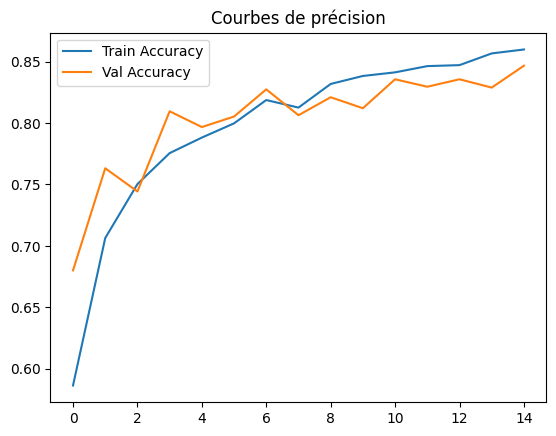

In [27]:
# 8. Visualisation des courbes d'entraînement
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Courbes de précision')
plt.show()

### Les compraisons 

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step


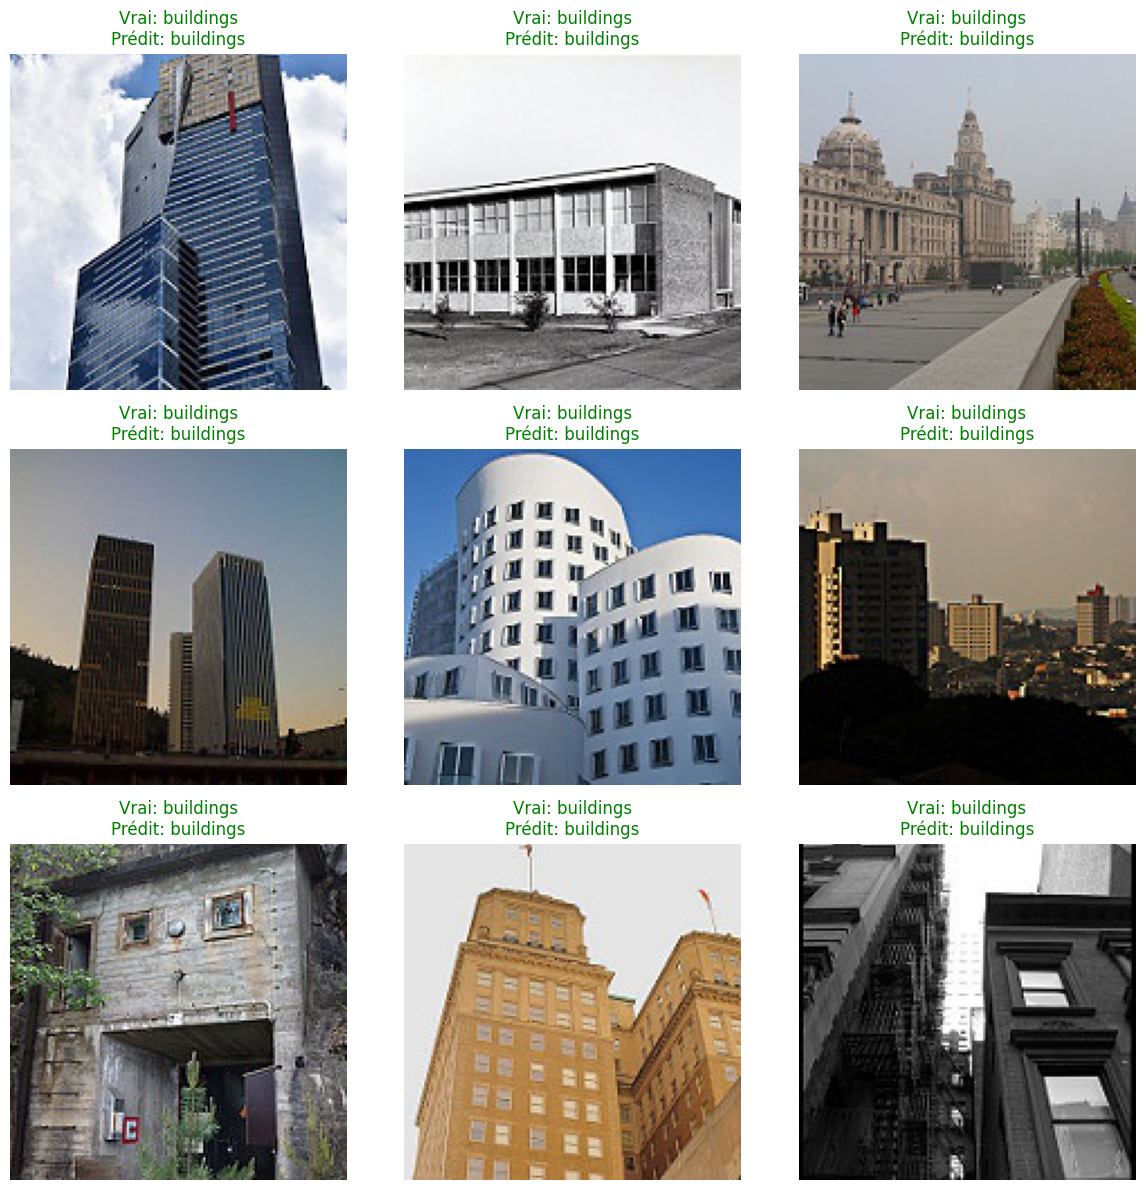

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Obtenir les prédictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Afficher quelques images avec prédiction vs vérité
plt.figure(figsize=(12, 12))
for i in range(9):
    img, label = test_generator[i][0][0], test_generator[i][1][0]
    true_label = class_labels[np.argmax(label)]
    pred_label = class_labels[predicted_classes[i]]
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(f"Vrai: {true_label}\nPrédit: {pred_label}", color='green' if true_label == pred_label else 'red')
    plt.axis('off')
plt.tight_layout()
plt.show()